**Step 1: Import Necessary Packages**

In [8]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

**Step 2: Create Fake Data**

We are creating a fake dataset with 800 rows, four predictor variables, and one binary response variable:

In [9]:
#create fake dataset
X, y = datasets.make_classification(n_samples=800,
                                    n_features=4,
                                    n_informative=3,
                                    n_redundant=1,
                                    random_state=0)

#split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

**Step 3: Fit multiple models and plot ROC curves**

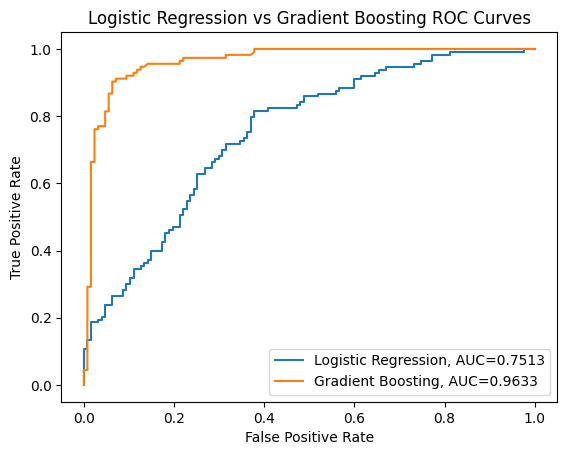

In [10]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression vs Gradient Boosting ROC Curves")

#add legend
plt.legend()

True positive is a term used in machine learning and security to describe a situation where a test or an alarm correctly identifies a positive case.

True negative is a term used to describe a situation where something is correctly identified as not having a certain feature.

A false positive error is a type I error where the test is checking a single condition, and wrongly gives an affirmative (positive) decision. 

A false negative error, or false negative, is a type II error which wrongly indicates that a condition does not hold. 

Here, true positive rate (TPR) = number of true positives / (number of true positives + number of false negatives)

false positive rate (FPR) = number of false positives / (number of false positives + number of true negatives)

The blue line shows the ROC curve for the logistic regression model, and the orange line shows the ROC curve for the gradient-boosted model.

The more that a ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

To quantify this, we can calculate the area under the curve (AUC) which tells us how much of the plot is located under the curve.

The closer AUC is to 1, the better the model.

From our plot we can see the following AUC metrics for each model:

AUC of logistic regression model: 0.7513

AUC of gradient boosted model: 0.9633

Hence, it is quite clear that the gradient boosted model does a better job of classifying the data into categories compared to the logistic regression model.